### Basic ISC

The goal of this notebook is to run a simple overall ISC (across the whole sample) in order to establish comparability with the older partly-cloudy study. 

To this end, we'll quickly reproduce the old study's basic ISC results. 

Note, however, that the study had some differences: The MRI parameters differed (TR -- hence, different lenght), the movie was possibly cut slightly differently (though that wouldn't directly impact the ISC comparison), and we had used only a 268-parcellation (Shen), whereas the current, newer data made use of a 293-region parcellation (that does, however, include the Shen-regions as regions 1-268 --- and then amends them with subcortical regions like the AAN and basal ganglia).

#### Import modules

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, nilearn, pickle
from nilearn import plotting, input_data, datasets
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from utils import *
import warnings
warnings.simplefilter("ignore")

#### Load timeseries, run basic ISC (static)

In [3]:
# load timeseries, swap axes
ts_array = np.load('../data/99_other/old_study_ts_array_shen268_regional_average_ages13-99.npy')
ts_data = np.swapaxes(ts_array, 0, 2)
ts_data = np.swapaxes(ts_data, 0, 1)

# submit to ISC analysis
# takes about 15-20 minutes on normal machine
ISC, p, distribution = partly_phaseshift_isc(ts_data, 
                                           pairwise= False,
                                           summary_statistic = np.mean,
                                           n_shifts = 1000, #can reduce to speed up, better increase to 1000
                                           return_distribution=True)

ISC[np.isnan(ISC)] = 0

# Stats correction (uncomment if you computed enough n_shifts)
alpha                           = .05
q                               = multipletests(p[0, :], method='fdr_by')[1]
corrected                       = q[np.newaxis, :] < alpha
ISC[corrected == False]         = 0

isc_result_dict                 = {}
isc_result_dict['ISC']          = ISC
isc_result_dict['p']            = p
isc_result_dict['distribution'] = distribution

#### Plot ISC results

<Figure size 720x432 with 0 Axes>

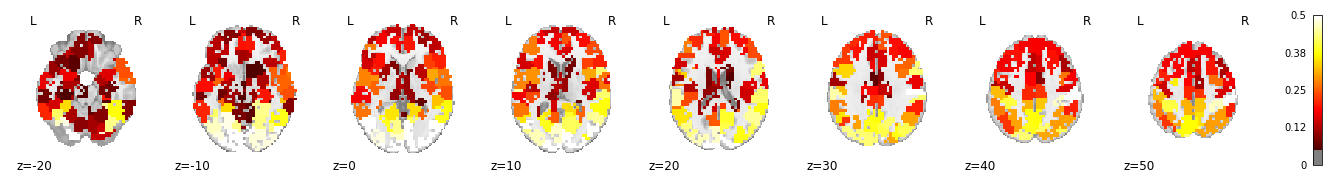

In [4]:
shen_file = '../data/02_rois_masks_maps/shen_2mm_268_parcellation.nii';

labels_masker = input_data.NiftiLabelsMasker(shen_file);
dataset = datasets.fetch_development_fmri(n_subjects = 1);
labels_masker.fit_transform(dataset.func[0]);

curr_isc = np.reshape(ISC, (268,1)).T
curr_img = labels_masker.inverse_transform(curr_isc);

plt.figure(figsize = (10,6));
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                                   threshold    = 0.05, 
                                   vmax         = 0.5, 
                                   draw_cross   = True,
                                   display_mode = 'z',
                                   cut_coords   = [ -20, -10, 0, 10, 20,  30, 40, 50],
                                   annotate     = True,);
plt.show();

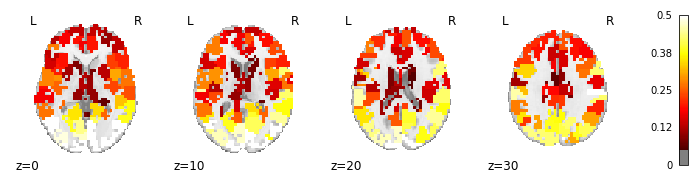

In [5]:
#plt.figure(figsize = (5,38));
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                                   threshold    = 0.05, 
                                   vmax         = 0.5, 
                                   draw_cross   = True,
                                   display_mode = 'z',
                                   cut_coords   = [ 0, 10, 20, 30],
                                   annotate     = True,);
plt.show();

In [6]:
np.save('../data/99_other/oldstudy_isc.npy', curr_isc)

In [12]:
ts_data.shape

(168, 268, 33)

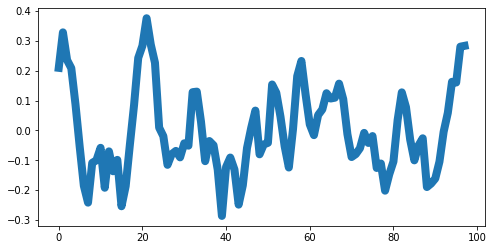

In [13]:
mts = np.mean(ts_data, axis =2)

from scipy import signal
m1 = mts[:100,50]
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

mts1 = moving_average(m1)
plt.figure(figsize=(8,4))
plt.plot(mts1, linewidth =8)

In [14]:
mts1


array([ 0.20960447,  0.32841166,  0.23547057,  0.20850035,  0.08759488,
       -0.0532334 , -0.18537389, -0.24172171, -0.10861063, -0.09995364,
       -0.05813619, -0.19192707, -0.07005779, -0.13665364, -0.09852447,
       -0.25389601, -0.18650259, -0.04807992,  0.08466039,  0.24279726,
        0.28352232,  0.37566525,  0.2875049 ,  0.22667703,  0.00941336,
       -0.01916896, -0.11515298, -0.07936119, -0.06850502, -0.09015955,
       -0.04305438, -0.05091733,  0.12814875,  0.12994485,  0.02970054,
       -0.10288251, -0.0354367 , -0.04959294, -0.13138386, -0.28616908,
       -0.1224297 , -0.09070539, -0.13087814, -0.24844648, -0.18373087,
       -0.05886256,  0.00860781,  0.06650131, -0.07995387, -0.04691727,
       -0.04155383,  0.15386957,  0.12604565,  0.04615245, -0.05330112,
       -0.12415793,  0.00503265,  0.18178743,  0.23264309,  0.1206038 ,
        0.02025005, -0.01571595,  0.05157407,  0.07037243,  0.12461082,
        0.10694027,  0.10960141,  0.15669079,  0.1048604 , -0.01